## Importing Libraries that will be used

In [1]:
import json
import random 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import tqdm.notebook as tq 

# This will load the fields list
import fields
fieldsFilter = fields.fields

Cleaning Functions

In [28]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def remove_user_mentions(text):
    clean_tweet = re.sub("@[A-Za-z0-9_]+","", text)
    clean_tweet = re.sub("#[A-Za-z0-9_]+","", clean_tweet)
    return clean_tweet

def remove_connecting_words(text):    
    clean_tweet = re.sub('\s+(a|an|and|the|is|from|as|our|it|in|by|at|to|of|on|be|this|up|so|are|has|if|was|for)(\s+)', '\2', text)
    return clean_tweet
    

Creat a small sample data

In [23]:
no_samples = "200"
list_tweets = None

with open("./20200916/hydrated_tweets_short.json", "r") as myfile:
    list_tweets = list(myfile)

if int(no_samples) > len(list_tweets):
    no_samples = len(list_tweets)

sample = random.sample(list_tweets, int(no_samples))

file = open("sample_data.json", "w")
for i in sample:
  file.write(i)
file.close() #This close() is important

In [24]:
fileN = "sample_data.json"
data = []
with open(fileN, 'r') as f:
    for line in f:
        data.append(json.loads(line))
        
        
tweet_df = pd.json_normalize(data)
# Cleaner solution in case some of the fields in the list are non existent and/or have typos
tweet_df = tweet_df.loc[:, tweet_df.columns.isin(fieldsFilter)]

tweet_df['text'] = tweet_df['text'].str.replace('\n','')
tweet_df['text'] = tweet_df['text'].str.replace('\r','')


tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_urls(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_twitter_urls(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_emoticons(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_emoji(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : give_emoji_free_text(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_user_mentions(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_connecting_words(x))



In [25]:
tweet_df

,created_at,text,in_reply_to_screen_name,retweet_count,favorite_count,source,id_str
0,Thu Sep 17 02:34:47 +0000 2020,VIDEO: Gov. David Ige says Hawaii COVID-19 pre...,None,1,0,Twitter Web App,1306421310885523457
1,Wed Sep 16 20:25:50 +0000 2020,THE USA PRESIDENT;THE PROTECTOR OF CORONAVI...,mitchellreports,0,0,Twitter for iPhone,1306328462714699782
2,Wed Sep 16 20:32:28 +0000 2020,Joe Biden says he spokeexperts aboutaddition...,CNNPolitics,50,149,SnapStream TV Search,1306330130676097024
3,Thu Sep 17 03:54:50 +0000 2020,Pfizer says Covid-19 vaccine showed moderate s...,None,0,0,Twitter Web App,1306441456605786113
4,Wed Sep 16 10:48:03 +0000 2020,Bro womenevil smh,None,0,1,Twitter for iPhone,1306183058845044736
...,...,...,...,...,...,...,...
195,Wed Sep 16 11:41:14 +0000 2020,Free Homeo Medical CampNagireddypally Village...,HamsaHomeopathy,0,1,Twitter for Android,1306196442189504512
196,Wed Sep 16 22:34:51 +0000 2020,Michael Caputo was broughtto streamline coron...,None,0,0,Twitter Web App,1306360931337691136
197,Wed Sep 16 23:12:29 +0000 2020,10% dining surchargehelp struggling NYC resta...,None,0,0,Twitter for iPhone,1306370403317809152
198,Wed Sep 16 16:03:35 +0000 2020,The Washington State DepartmentSocialHealth ...,None,0,2,Twitter Web App,1306262464057815046


Top 50 most unique words used from the dataset 

         Word  Frequency
     COVID-19         24
          The         16
          for         15
            I         14
         that         12
  coronavirus         10
            -         10
        Trump         10
         with         10
         will         10
          has          9
          via          9
         have          8
        their          7
     Covid-19          7
          you          6
           if          6
         says          6
         your          6
         been          5
        &amp;          5
         News          5
          new          5
      vaccine          5
            …          5
    President          5
         many          5
  Coronavirus          5
          but          5
        cases          5
           He          4
        about          4
            |          4
         last          4
         it's          4
     pandemic          4
         It’s          4
 

<AxesSubplot:title={'center':'Top 50 most unique words used from the dataset'}, ylabel='Frequency'>

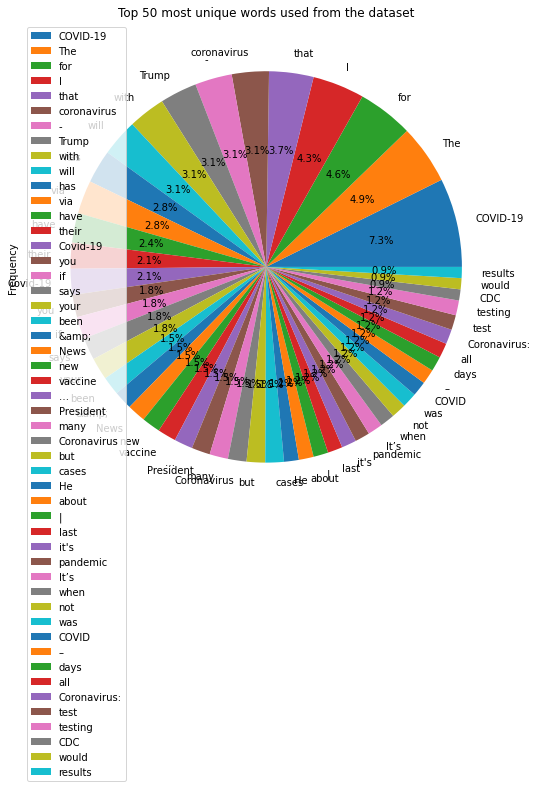

In [26]:


no_top_unique_words = "50" #@param {type:"string"}

# df = pd.read_csv('sample_data.tsv',sep="\t")

result = Counter(" ".join(tweet_df['text'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')

Run for the entire dataset

In [32]:
fileN = "./20200916/hydrated_tweets_short.json"
complete_tweets = []
with open(fileN, 'r') as f:
    for line in f:
        complete_tweets.append(json.loads(line))    

        
tweet_df = pd.json_normalize(complete_tweets)
# Cleaner solution in case some of the fields in the list are non existent and/or have typos
tweet_df = tweet_df.loc[:, tweet_df.columns.isin(fieldsFilter)]

tweet_df['text'] = tweet_df['text'].str.replace('\n','')
tweet_df['text'] = tweet_df['text'].str.replace('\r','')


tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_urls(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_twitter_urls(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_emoticons(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_emoji(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : give_emoji_free_text(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_user_mentions(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x : remove_connecting_words(x))


tweet_df.to_json(r'cleaned_tweets\2020916.json')

In [33]:
tweet_df.head()

,created_at,text,in_reply_to_screen_name,retweet_count,favorite_count,source,id_str
0,Wed Sep 16 04:02:37 +0000 2020,"Byweekend it’s likely that 200,000 peoplethi...",None,93,130,Twitter for iPad,1306081028553859073
1,Wed Sep 16 04:02:31 +0000 2020,How does he not understanddifference between...,atrupar,0,2,Twitter for Android,1306081001165205504
2,Wed Sep 16 04:02:22 +0000 2020,Parliament LIVE Updates: DebateCOVID-19Rajya...,None,0,0,WordPress.com,1306080964951629824
3,Wed Sep 16 04:02:25 +0000 2020,Mesa Public Schools &amp; City teamto give fr...,None,1,3,Twitter for iPhone,1306080977710542850
4,Wed Sep 16 04:02:21 +0000 2020,"Maybe he really meant ""herd mentality"", becau...",McFaul,0,2,Twitter Web App,1306080959897296903
